# ARIMA Model Price Forecasting
- Acurate for predictions at most 2 days out, assuming volatility is low for those days

In [1]:
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#https://www.kaggle.com/code/bogdanbaraban/ar-arima-lstm#ARIMA-model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Moving Average (MA) Experiment

In [2]:
# Read the CSV file
data = pd.read_csv('prices_and_volforecast.csv')

symbols = data['symbol'].unique()

ma_days = {10, 20, 30}

for sym in symbols:
    ma = {}
    for days in ma_days:
        col_name = f"{days}-Day MA"
        data.loc[data['symbol'] == sym, col_name] = data.loc[data['symbol'] == sym, 'close'].rolling(days).mean()

data

,date,symbol,open,close,low,high,volume,returns,forecasted_volatility,10-Day MA,20-Day MA,30-Day MA
0,2010-01-04,CMCSA,16.750000,16.969999,16.750000,17.129999,13573400.0,1.313427,0.000000,NaN,NaN,NaN
1,2010-01-04,DIS,32.500000,32.070000,31.870001,32.750000,13700400.0,-1.323077,0.000000,NaN,NaN,NaN
2,2010-01-04,FOXA,14.049999,13.929995,13.890002,14.220003,16512700.0,-0.854121,0.000000,NaN,NaN,NaN
3,2010-01-04,NFLX,55.519999,53.479999,52.960001,55.730000,17239600.0,-3.674352,0.000000,NaN,NaN,NaN
4,2010-01-05,CMCSA,16.930000,16.740000,16.549999,16.980000,17746500.0,-1.122268,1.217848,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7043,2016-12-29,NFLX,125.949997,125.330002,124.199997,126.139999,3443700.0,-0.492255,1.745248,125.703001,124.0175,121.610667
7044,2016-12-30,CMCSA,69.949997,69.050003,68.930000,70.050003,12188400.0,-1.286625,1.021556,70.398000,69.8515,69.567333
7045,2016-12-30,DIS,104.570000,104.220001,103.959999,105.000000,6629500.0,-0.334703,0.778195,104.905000,103.7375,102.049333
7046,2016-12-30,FOXA,28.290001,28.040001,27.920000,28.370001,6161200.0,-0.883704,2.029537,28.290001,27.9855,28.045667


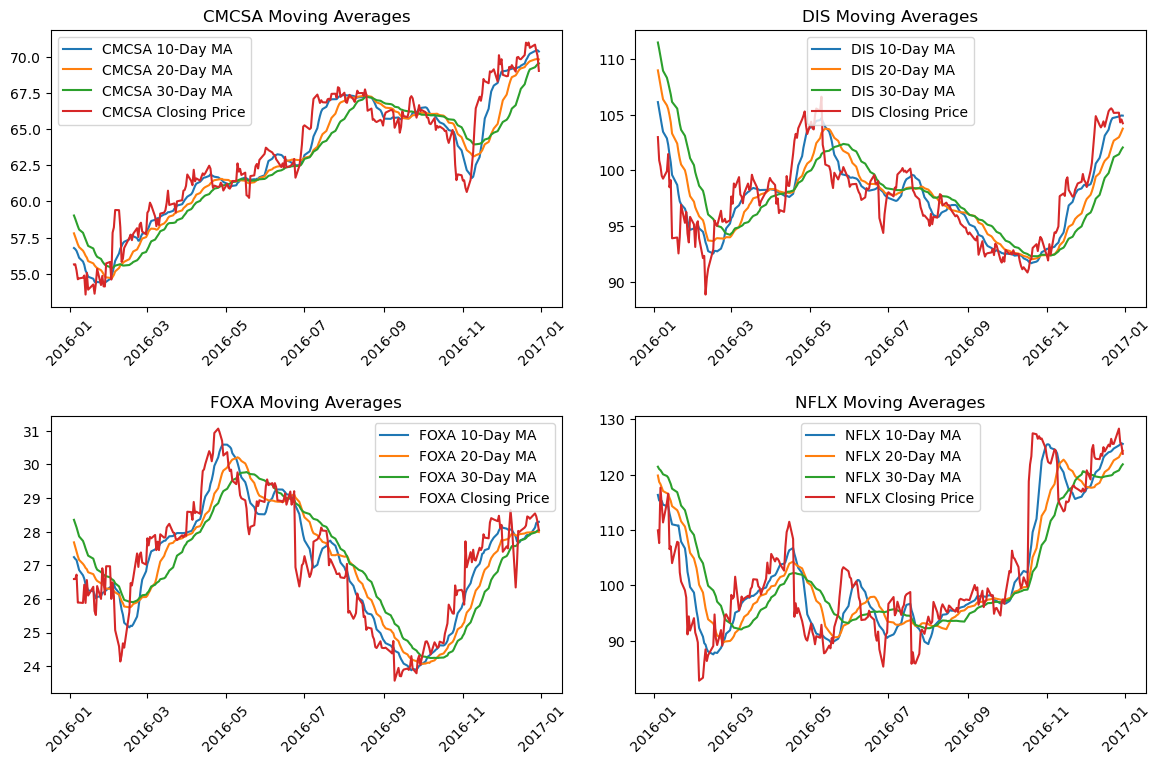

In [7]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over symbols and plot data
for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]
    symbol_data = symbol_data.iloc[-252:]  # Just 1 years worth, to see difference in prediction windows. Assuming 252 trading days in a year
    dates = pd.to_datetime(symbol_data['date'], format='%Y-%m-%d')
    
    # Plot 1 day MA
    oneday, = axes[i // 2, i % 2].plot(dates, symbol_data['10-Day MA'], label=f'{symbol} 10-Day MA')
    # Plot 10 day MA
    tenday, = axes[i // 2, i % 2].plot(dates, symbol_data['20-Day MA'], label=f'{symbol} 20-Day MA')
    # plot 30 day MA
    thirtyday, = axes[i // 2, i % 2].plot(dates, symbol_data['30-Day MA'], label=f'{symbol} 30-Day MA')
    #plot close price
    close, = axes[i // 2, i % 2].plot(dates, symbol_data['close'], label=f'{symbol} Closing Price')
    # Set subplot title
    axes[i // 2, i % 2].set_title(f'{symbol} Moving Averages')
    # Add legend
    axes[i // 2, i % 2].legend()
    # Rotate x-axis labels for better visibility
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout(pad=2.0)

# Hide unused plot
#axes[1,1].set_visible(False)

# Show the plot
plt.show()

In [4]:
# add all info to new csv
data.to_csv('prices_ma_and_volforecast.csv', index=False)